## IMPORTING PACKAGES 

In [1]:
# Importing packages 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import time 

## USING READ PICKLE 

In [2]:
df_trees = pd.read_pickle('./df_trees.pkl')

## CREATING DATA SPLIT 

In [3]:
# Creating y and x 
y = df_trees['ANNEEDEPLANTATION']
x = df_trees.drop('ANNEEDEPLANTATION', axis=1)

# Creating training and testing dataset 
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0) 

## PIPELINE 

In [4]:
# Creating list of numerical and categorical values 
num_var = make_column_selector(dtype_include=np.number)
cat_var = make_column_selector(dtype_include=object)

In [5]:
# Creating mun et cat pipelines 
num_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), 
                             StandardScaler())

cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'),
                            OneHotEncoder(handle_unknown='ignore'))

In [6]:
# Creating pipeline combining num et cat var
preprocess = make_column_transformer((num_pipeline, num_var),
                                    (cat_pipeline, cat_var))

In [8]:
# lin_model.named_steps['columntransformer'].transformers_[1][1].named_steps['onehotencoder'].categories_


## TESTING NAIF_MODELE

In [18]:
# Creating naif model 
naif_model = y_train.mean()
naif_model

1989.6898603093464

In [19]:
# computing MSE of naif model 
def compute_MSE(y, y_predict):
    mse = 0
    n = len(y)
    for i in (y):
        mse_calcule = (i - y_predict)**2
        mse = mse_calcule + mse
    return mse / n 

# print(f'naif_model MSE =
MSE_naif_model = compute_MSE(y_test, naif_model)
print(f'mean MSE = {MSE_naif_model}')

mean MSE = 321.4670713373224


## TESTING LIN_MODELE

In [43]:
# Trainning lin_model and testing overfitting  

# Creating 
lin_model = make_pipeline(preprocess, LinearRegression())

# Testing overfitting 
lin_cv_scores_train = cross_val_score(lin_model, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
lin_cv_scores_R2_train = cross_val_score(lin_model, x_train, y_train, cv=5, scoring='r2')

print(f'naif model MSE = {MSE_naif_model}')
print('lin_model train mean MSE:',np.mean(-lin_cv_scores_train))
print('lin_model train std MSE:',np.std(-lin_cv_scores_train))
print('lin_model train mean R²:',np.mean(lin_cv_scores_R2_train))
print('lin_model train std R²:',np.std(lin_cv_scores_R2_train))

naif model MSE = 321.4670713373224
lin_model train mean MSE: 162.58526634313242
lin_model train std MSE: 4.693593014502271
lin_model train mean R²: 0.4899604137256414
lin_model train std R²: 0.009223693810323792


In [41]:
# Fitting and testing lin_model

# Fitting 
lin_model.fit(x_train,y_train)

# Testing 
y_pred_train_lin = lin_model.predict(x_train)
lin_mse_train = mean_squared_error(y_train,y_pred_train_lin)
y_pred_test_lin = lin_model.predict(x_test)
lin_mse_test = mean_squared_error(y_test,y_pred_test_lin)
lin_r2_train = lin_model.score(x_train, y_train)
lin_r2_test = lin_model.score(x_test, y_test)

print(f'naif model MSE = {MSE_naif_model}')
print(f'lin_model train MSE : {lin_mse_train}')
print(f'lin_model train R² : {lin_r2_train}')
print(f'lin_model test MSE : {lin_mse_test}')
print(f'lin_model test R² : {lin_r2_test}')

naif model MSE = 321.4670713373224
lin_model train MSE : 156.89878787773398
lin_model train R² : 0.5077390743965187
lin_model test MSE : 163.84672887055598
lin_model test R² : 0.49031431942549275


## TESTING SVR_MODEL

In [38]:
# Creating forest_model and testing overfitting 

# Creating 
SVR_model = make_pipeline(preprocess, SVR())

# Testing overfitting 
SVR_cv_scores_train = cross_val_score(SVR_model, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
SVR_cv_scores_R2_train = cross_val_score(SVR_model, x_train, y_train, cv=5, scoring='r2')

print(f'naif model MSE = {MSE_naif_model}')
print('SVR_model train mean MSE:',np.mean(-SVR_cv_scores_train))
print('SVR_model train std MSE:',np.std(-SVR_cv_scores_train))
print('SVR_model train mean R²:',np.mean(SVR_cv_scores_R2_train))
print('SVR_model train std R²:',np.std(SVR_cv_scores_R2_train))

naif model MSE = 321.4670713373224
SVR_model train mean MSE: 155.5955785609023
SVR_model train std MSE: 5.625580288666737
SVR_model train mean R²: 0.5118950437257619
SVR_model train std R²: 0.013632678461715661


In [39]:
# Fitting and testing SVR_model

# Fitting 
SVR_model.fit(x_train,y_train)

# Testing 
y_pred_train_SVR = SVR_model.predict(x_train)
SVR_mse_train = mean_squared_error(y_train,y_pred_train_SVR)
y_pred_test_SVR = SVR_model.predict(x_test)
SVR_mse_test = mean_squared_error(y_test,y_pred_test_SVR)
SVR_r2_train = SVR_model.score(x_train, y_train)
SVR_r2_test = SVR_model.score(x_test, y_test)

print(f'naif model MSE = {MSE_naif_model}')
print(f'SVR_model train MSE : {SVR_mse_train}')
print(f'SVR_model train R² : {SVR_r2_train}')
print(f'SVR_model test MSE : {SVR_mse_test}')
print(f'SVR_model test R² : {SVR_r2_test}')

naif model MSE = 321.4670713373224
SVR_model train MSE : 145.97638236194607
SVR_model train R² : 0.5420074936860813
SVR_model test MSE : 153.445155778634
SVR_model test R² : 0.5226709791949418


## TESTING TREE_MODEL

In [36]:
# Creating tree_model and testing overfitting

# Creating 
tree_model = make_pipeline(preprocess, tree.DecisionTreeRegressor())

# Testing overfitting 
tree_cv_scores_train = cross_val_score(tree_model, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
tree_cv_scores_R2_train = cross_val_score(tree_model, x_train, y_train, cv=5, scoring='r2')

print(f'naif model MSE = {MSE_naif_model}')
print('tree_model train mean MSE:',np.mean(-tree_cv_scores_train))
print('tree_model train std MSE:',np.std(-tree_cv_scores_train))
print('tree_model train mean R²:',np.mean(tree_cv_scores_R2_train))
print('tree_model train std R²:',np.std(tree_cv_scores_R2_train))

naif model MSE = 321.4670713373224
tree_model train mean MSE: 76.62608424456337
tree_model train std MSE: 5.526464114823786
tree_model train mean R²: 0.7575177242332058
tree_model train std R²: 0.015454159856259241


In [37]:
# Testing tree_model 

# Fitting 
tree_model.fit(x_train,y_train)

# Testing 
y_pred_train_tree = tree_model.predict(x_train)
tree_mse_train = mean_squared_error(y_train,y_pred_train_tree)
y_pred_test_tree = tree_model.predict(x_test)
tree_mse_test = mean_squared_error(y_test,y_pred_test_tree)
tree_r2_train = tree_model.score(x_train, y_train)
tree_r2_test = tree_model.score(x_test, y_test)

print(f'naif model MSE = {MSE_naif_model}')
print(f'tree_model train MSE : {tree_mse_train}')
print(f'tree_model train R² : {tree_r2_train}')
print(f'tree_model test MSE : {tree_mse_test}')
print(f'tree_model test R² : {tree_r2_test}')

naif model MSE = 321.4670713373224
tree_model train MSE : 0.0
tree_model train R² : 1.0
tree_model test MSE : 73.25247851949769
tree_model test R² : 0.7721300899606238


## TESTING FOREST_MODEL

In [32]:
# Creating forest_model and testing overfitting 

# Creating 
forest_model = make_pipeline(preprocess, RandomForestRegressor(n_estimators=10))

# Testing overfitting 
forest_cv_scores_train = cross_val_score(forest_model, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
forest_cv_scores_R2_train = cross_val_score(forest_model, x_train, y_train, cv=5, scoring='r2')

print(f'naif model MSE = {MSE_naif_model}')
print('forest_model train mean MSE:',np.mean(-forest_cv_scores_train))
print('forest_model train std MSE:',np.std(-forest_cv_scores_train))
print('forest_model train mean R²:',np.mean(forest_cv_scores_R2_train))
print('forest_model train std R²:',np.std(forest_cv_scores_R2_train))

naif model MSE = 321.4670713373224
forest_model train mean MSE: 52.51664284142011
forest_model train std MSE: 4.880023098675987
forest_model train mean R²: 0.8340979899405413
forest_model train std R²: 0.01389320100372562


In [35]:
# Fitting and testing forest_model

# Fitting 
forest_model.fit(x_train,y_train)

# Testing 
y_pred_train_forest = forest_model.predict(x_train)
forest_mse_train = mean_squared_error(y_train,y_pred_train_forest)
y_pred_test_forest = forest_model.predict(x_test)
forest_mse_test = mean_squared_error(y_test,y_pred_test_forest)
forest_r2_train = forest_model.score(x_train, y_train)
forest_r2_test = forest_model.score(x_test, y_test)

print(f'naif model MSE = {MSE_naif_model}')
print(f'forest_model train MSE : {forest_mse_train}')
print(f'forest_model train R² : {forest_r2_train}')
print(f'forest_model test MSE : {forest_mse_test}')
print(f'forest_model test R² : {forest_r2_test}')

naif model MSE = 321.4670713373224
forest_model train MSE : 8.6451764861411
forest_model train R² : 0.9728762558548918
forest_model test MSE : 47.146270984798406
forest_model test R² : 0.8533398904019537


In [45]:
# Varifiying model kyes 
forest_model.named_steps.keys()

dict_keys(['columntransformer', 'randomforestregressor'])

## GRIDSEARCH RANDOM FOREST  

In [47]:
# Creating grid 
model = make_pipeline(preprocess, RandomForestRegressor())

# Creating 
params = {
    'randomforestregressor__n_estimators':[75],
    'randomforestregressor__min_samples_split':[2, 3, 4,],
    'randomforestregressor__min_samples_leaf':[1, 2, 3, 4]
}

# Creating gridsearch 
grid = GridSearchCV(model, param_grid=params, cv=5,n_jobs=-1)

# Model fitting 
grid.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f6153826f40>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('simpleimputer...
                     

In [50]:
# Model testing 
grid.score(x_test, y_test)

0.8685407677601558

In [58]:
# Seeing trees depth mean  
l_d=[]
for estimator in grid.best_estimator_.named_steps['randomforestregressor'].estimators_:
    l_d.append(estimator.get_depth())
sum(l_d)/len(l_d)

60.586666666666666

In [61]:
# grid displaying max_features parameter 
l = []
for estimator in grid.best_estimator_.named_steps['randomforestregressor'].estimators_:
    l.append(estimator.max_features_)    
sum(l)/len(l)

[391,
 391,
 391,
 391,
 391,
 391,
 391,
 391,
 391,
 391,
 391,
 391,
 391,
 391,
 391,
 391,
 391,
 391,
 391,
 391,
 391,
 391,
 391,
 391,
 391,
 391,
 391,
 391,
 391,
 391,
 391,
 391,
 391,
 391,
 391,
 391,
 391,
 391,
 391,
 391,
 391,
 391,
 391,
 391,
 391,
 391,
 391,
 391,
 391,
 391,
 391,
 391,
 391,
 391,
 391,
 391,
 391,
 391,
 391,
 391,
 391,
 391,
 391,
 391,
 391,
 391,
 391,
 391,
 391,
 391,
 391,
 391,
 391,
 391,
 391]

In [9]:
# Creating grid2
model = make_pipeline(preprocess, RandomForestRegressor())

# Creating 
params2 = {
    'randomforestregressor__n_estimators':[75, 125, 200],
    'randomforestregressor__max_depth':[50, 40, 30],
    'randomforestregressor__max_features':[350, 250, 150]
}

# Creating gridsearch 
grid2 = GridSearchCV(model, param_grid=params2, cv=4,n_jobs=-1)

# Model fitting 
grid2.fit(x_train, y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000022AFC421DC0>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('simpleimp...
                     

In [10]:
# Model testing 
grid2.score(x_test, y_test)

0.874158659777358

In [12]:
grid2.best_params_

{'randomforestregressor__max_depth': 50,
 'randomforestregressor__max_features': 150,
 'randomforestregressor__n_estimators': 200}

In [13]:
# Seeing trees depth mean  
l_d2=[]
for estimator in grid2.best_estimator_.named_steps['randomforestregressor'].estimators_:
    l_d2.append(estimator.get_depth())
sum(l_d2)/len(l_d2)

49.995

In [ ]:
# grid2 displaying max_features parameter 

for i in grid2.best_estimator_.named_steps['randomforestregressor'].estimators_ : 
    print(i.max_features_)    

## PREDICTING YEAR VALUES 

In [26]:
y_predict_test = grid2.predict(x_test)

1989.5347021643538

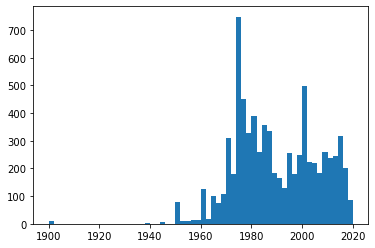

In [35]:
plt.figure()
plt.hist(y_predict_test, bins=60);
# mean of predictions 
y_predict_test.mean()

In [7]:
# Creating grid3
model = make_pipeline(preprocess, RandomForestRegressor())

# Creating 
params3 = {
    'randomforestregressor__n_estimators':[200, 300, 400],
    'randomforestregressor__max_depth':[50, 45],
    'randomforestregressor__max_features':[150, 100]
}

# Creating gridsearch 
grid3 = GridSearchCV(model, param_grid=params3, cv=4,n_jobs=-1)

start=time.time()
# Model fitting 
grid3.fit(x_train, y_train)

end=time.time()

print(start-end)

-2229.9422097206116


In [14]:
grid3.score(x_test, y_test)

0.8738261754124979

In [15]:
# Creating grid4
model = make_pipeline(preprocess, RandomForestRegressor(random_state=10))

# Creating 
params4 = {
    'randomforestregressor__n_estimators':[200, 300],
    'randomforestregressor__max_depth':[50, 40],
    'randomforestregressor__max_features':[100, 75]
}

# Creating gridsearch 
grid4 = GridSearchCV(model, param_grid=params4, cv=4,n_jobs=-1)

start=time.time()
# Model fitting 
grid4.fit(x_train, y_train)

end=time.time()

print(start-end)

-1135.1666700839996


In [16]:
grid4.score(x_test, y_test)

0.8742528736358519

In [17]:
grid4.best_params_

{'randomforestregressor__max_depth': 50,
 'randomforestregressor__max_features': 100,
 'randomforestregressor__n_estimators': 300}

## TESTING GRIDSEARCH WITH NEW COLUMNS  

In [24]:
# Creating grid5 with new columns 
model = make_pipeline(preprocess, RandomForestRegressor(random_state=10))

# Creating 
params5 = {
    'randomforestregressor__n_estimators':[200, 300, 400, 500],
    'randomforestregressor__max_depth':[60, 50, 40],
    'randomforestregressor__max_features':[125, 100, 75, 50]
}

# Creating gridsearch 
grid5 = GridSearchCV(model, param_grid=params5, cv=4,n_jobs=-1) 

start=time.time()
# Model fitting 
grid5.fit(x_train, y_train)

end=time.time()

print(start-end)

-8817.505454301834


In [22]:
grid5.best_params_

{'randomforestregressor__max_depth': 50,
 'randomforestregressor__max_features': 75,
 'randomforestregressor__n_estimators': 300}

In [23]:
grid5.score(x_test, y_test)

0.8637114169834907

In [25]:
print(grid5.best_params_)
print(grid5.score(x_test, y_test))

{'randomforestregressor__max_depth': 60, 'randomforestregressor__max_features': 50, 'randomforestregressor__n_estimators': 500}
0.8664597070711992
